In [256]:
#  Q1: Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features. Use the data from 2005.
#  Q2: Create a query to get the list of films and a boolean indicating if it was rented last month (August 2005). This would be our target variable.
#  Q3: Read the data into a Pandas dataframe.
#  Q4: Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.
#  Q5: Create a logistic regression model to predict this variable from the cleaned data.
#  Q6: Evaluate the results.

In [257]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  
password = getpass.getpass()

········


Q1: Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features. Use the data from 2005.

In [258]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'

engine = create_engine(connection_string)

query = '''SELECT title, length, rental_duration, amount, rating, store_id,rental_id, rental_date FROM film
RIGHT JOIN inventory i USING (film_id)
INNER JOIN rental USING (inventory_id)
INNER JOIN payment using (rental_id)'''

# WHERE left(r.rental_date,7)="2005-05"

sakila = pd.read_sql_query(query, engine)
sakila.head()

,title,length,rental_duration,amount,rating,store_id,rental_id,rental_date
0,ACADEMY DINOSAUR,86,6,0.99,PG,1,4863,2005-07-08 19:03:15
1,ACADEMY DINOSAUR,86,6,3.99,PG,1,11433,2005-08-02 20:13:10
2,ACADEMY DINOSAUR,86,6,3.99,PG,1,14714,2005-08-21 21:27:43
3,ACADEMY DINOSAUR,86,6,1.99,PG,1,972,2005-05-30 20:21:07
4,ACADEMY DINOSAUR,86,6,0.99,PG,1,2117,2005-06-17 20:24:00


In [259]:
sakila.shape

(16044, 8)

Q2: Create a query to get the list of films and a boolean indicating if it was rented last month (August 2005). This would be our target. 

In [260]:
def check_rental(text):
        if '2005-05' in str(text):
            return 'yes'
        else:
            return 'No'
        
sakila["rental_status"] = sakila['rental_date'].apply(lambda x: check_rental(x))
sakila

,title,length,rental_duration,amount,rating,store_id,rental_id,rental_date,rental_status
0,ACADEMY DINOSAUR,86,6,0.99,PG,1,4863,2005-07-08 19:03:15,No
1,ACADEMY DINOSAUR,86,6,3.99,PG,1,11433,2005-08-02 20:13:10,No
2,ACADEMY DINOSAUR,86,6,3.99,PG,1,14714,2005-08-21 21:27:43,No
3,ACADEMY DINOSAUR,86,6,1.99,PG,1,972,2005-05-30 20:21:07,yes
4,ACADEMY DINOSAUR,86,6,0.99,PG,1,2117,2005-06-17 20:24:00,No
...,...,...,...,...,...,...,...,...,...
16039,ZORRO ARK,50,3,4.99,NC-17,2,711,2005-05-29 03:49:03,yes
16040,ZORRO ARK,50,3,4.99,NC-17,2,1493,2005-06-15 21:50:32,No
16041,ZORRO ARK,50,3,9.99,NC-17,2,6712,2005-07-12 13:24:47,No
16042,ZORRO ARK,50,3,4.99,NC-17,2,9701,2005-07-31 07:32:21,No


Q3: Read the data into a Pandas dataframe.

In [261]:
sakila

,title,length,rental_duration,amount,rating,store_id,rental_id,rental_date,rental_status
0,ACADEMY DINOSAUR,86,6,0.99,PG,1,4863,2005-07-08 19:03:15,No
1,ACADEMY DINOSAUR,86,6,3.99,PG,1,11433,2005-08-02 20:13:10,No
2,ACADEMY DINOSAUR,86,6,3.99,PG,1,14714,2005-08-21 21:27:43,No
3,ACADEMY DINOSAUR,86,6,1.99,PG,1,972,2005-05-30 20:21:07,yes
4,ACADEMY DINOSAUR,86,6,0.99,PG,1,2117,2005-06-17 20:24:00,No
...,...,...,...,...,...,...,...,...,...
16039,ZORRO ARK,50,3,4.99,NC-17,2,711,2005-05-29 03:49:03,yes
16040,ZORRO ARK,50,3,4.99,NC-17,2,1493,2005-06-15 21:50:32,No
16041,ZORRO ARK,50,3,9.99,NC-17,2,6712,2005-07-12 13:24:47,No
16042,ZORRO ARK,50,3,4.99,NC-17,2,9701,2005-07-31 07:32:21,No


Q4: Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.

In [262]:
sakila.dtypes
# Features: there are 2 categorical column and one datetime. WE need to drop datetime as it is of no use now.
# Target (rental_status): it is categorical

title                      object
length                      int64
rental_duration             int64
amount                    float64
rating                     object
store_id                    int64
rental_id                   int64
rental_date        datetime64[ns]
rental_status              object
dtype: object

In [263]:
sakila = sakila.drop(['rental_id'],axis=1)

In [264]:
sakila = sakila.drop(['title'],axis=1)

In [265]:
sakila.columns

Index(['length', 'rental_duration', 'amount', 'rating', 'store_id',
       'rental_date', 'rental_status'],
      dtype='object')

In [266]:
# sakila['film_id'].value_counts()
#  sakila['title'].value_counts()
#  sakila['rental_duration'].value_counts()
sakila['rating'].value_counts()
# sakila['inventory_id'].value_counts()
# sakila['store_id'].value_counts()
# sakila['rental_status'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: rating, dtype: int64

In [267]:
sakila.isna().sum()

length             0
rental_duration    0
amount             0
rating             0
store_id           0
rental_date        0
rental_status      0
dtype: int64

In [268]:
# look for multicolinearity 
# (but i have two features with categorical column, therefore, i would have to remove them first before doing multicolinearity)

In [269]:
import numpy as np
X_num = sakila.select_dtypes(include = np.number)
X_cat = sakila.select_dtypes(include = object)

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

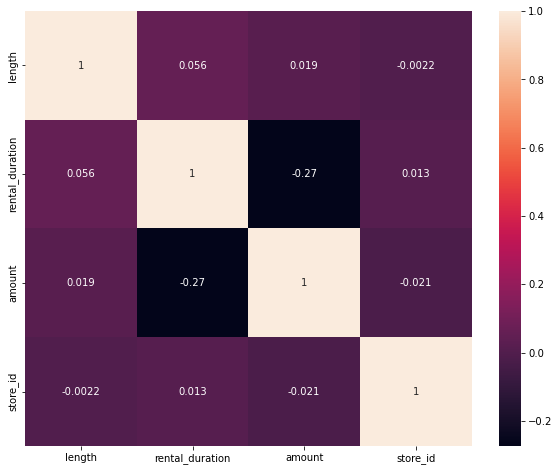

In [271]:
corr_matrix=X_num.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [272]:
from sklearn.preprocessing import MinMaxScaler

In [273]:
# Need to X-y-split AND train-test-split BEFORE I apply transformations, 
# then train transformation on training set only
y = sakila['rental_status']
X = sakila.drop('rental_status', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [274]:
X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)
X_train_norm.shape

(12835, 4)

Encode using GET DUMMIES: 

In [275]:
from sklearn.preprocessing import OneHotEncoder

In [276]:
X_train_categorical

,rating
15993,NC-17
14538,PG-13
174,R
6083,PG
9178,G
...,...
3239,NC-17
9448,NC-17
860,NC-17
8381,G


In [277]:
#  Similar to one hot encode: 
X_train_categorical = X_train.select_dtypes(include = np.object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['rating'],
                             drop_first=True)
X_train_cat.head()

C:\Users\gau82\AppData\Local\Temp\ipykernel_14816\3049214135.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_categorical = X_train.select_dtypes(include = np.object)


,rating_NC-17,rating_PG,rating_PG-13,rating_R
15993,1,0,0,0
14538,0,0,1,0
174,0,0,0,1
6083,0,1,0,0
9178,0,0,0,0


In [278]:
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

In [279]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [280]:
# for numericals
X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [281]:
# for categoricals
X_test_categorical = X_test.select_dtypes(include = np.object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['rating'],
                            drop_first=True)

C:\Users\gau82\AppData\Local\Temp\ipykernel_14816\270267797.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categorical = X_test.select_dtypes(include = np.object)


In [282]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [283]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
predictions
classification.score(X_test_transformed, y_test)


0.9280149579308196

In [284]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[2978,    0],
       [ 231,    0]], dtype=int64)

In [285]:
# predicted | R | NR | C | D |
# --------------------------
# actual  R | 2978| 0|   |   |
# --------------------------
#         NR |231 | 0 | |   |
# --------------------------
#         C |   |   | + |   |
# --------------------------
#         D |   |   |   | + |